In [2]:
# ============================
#   1. IMPORT LIBRARIES
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make visuals clean
plt.style.use('default')
sns.set_theme(style="whitegrid")


In [3]:
df = pd.read_csv('/content/BetelPrice.csv')
df.head()


,Date,District,Market Type,Commercial Type,Quality Grade,Price,Unnamed: 6,
0,1/5/2016,Kurunegala,Export,Peedunu,Premium,4500,NaN,NaN
1,1/5/2016,Kurunegala,Export,Peedunu,Standard,2000,NaN,NaN
2,1/5/2016,Kurunegala,Export,Kanda,Premium,5000,NaN,NaN
3,1/5/2016,Kurunegala,Export,Kanda,Standard,2000,NaN,NaN
4,1/5/2016,Kurunegala,Local,Peedunu,Premium,3000,NaN,NaN


In [4]:
print("Shape:", df.shape)
df.info()
df.describe()


Shape: (9429, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9429 entries, 0 to 9428
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             9429 non-null   object 
 1   District         9429 non-null   object 
 2   Market Type      9429 non-null   object 
 3   Commercial Type  9429 non-null   object 
 4   Quality Grade    9429 non-null   object 
 5   Price            9429 non-null   int64  
 6   Unnamed: 6       0 non-null      float64
 7                    0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 589.4+ KB


,Price,Unnamed: 6,
count,9429.000000,0.0,0.0
mean,3395.575777,NaN,NaN
std,3442.020581,NaN,NaN
min,20.000000,NaN,NaN
25%,1000.000000,NaN,NaN
50%,2300.000000,NaN,NaN
75%,5000.000000,NaN,NaN
max,30000.000000,NaN,NaN


In [5]:
df.isnull().sum()


,0
Date,0
District,0
Market Type,0
Commercial Type,0
Quality Grade,0
Price,0
Unnamed: 6,9429
,9429


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week.astype(int)

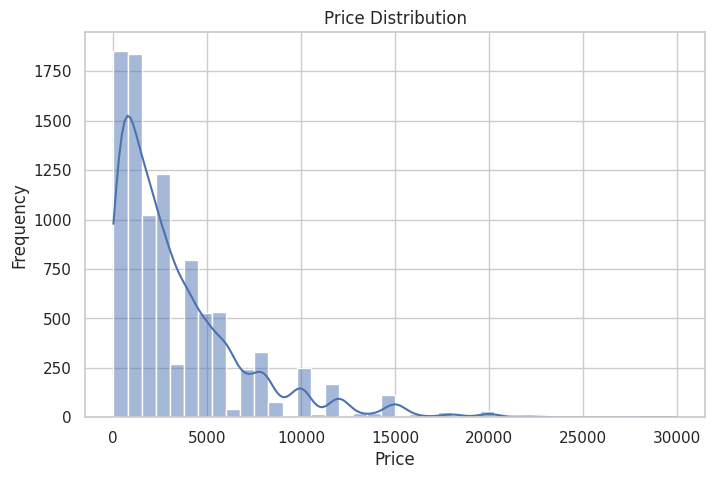

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=40, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

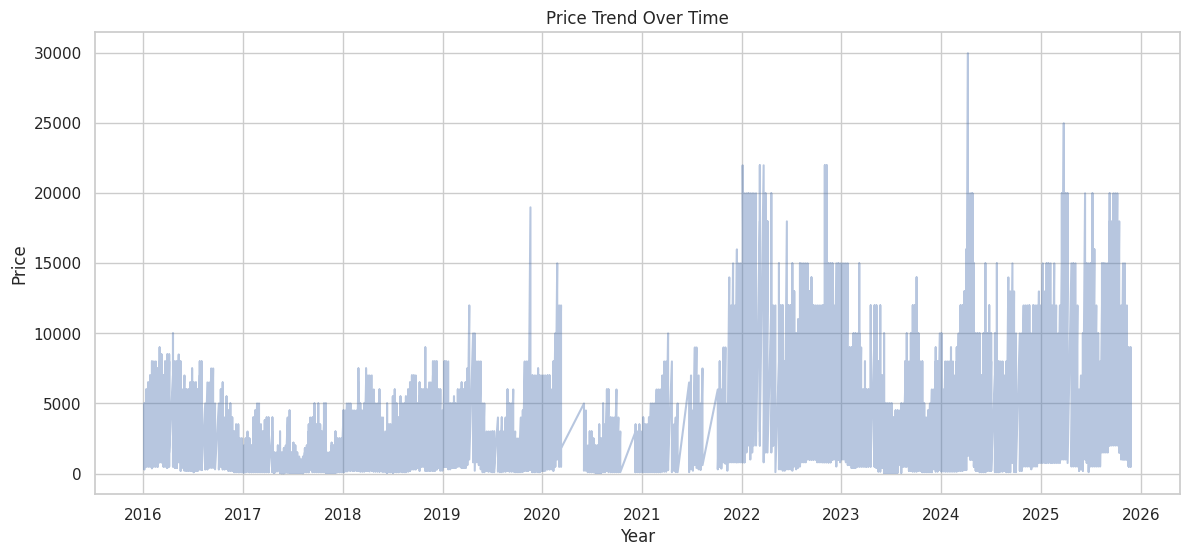

In [11]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Price'], alpha=0.4)
plt.title("Price Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()


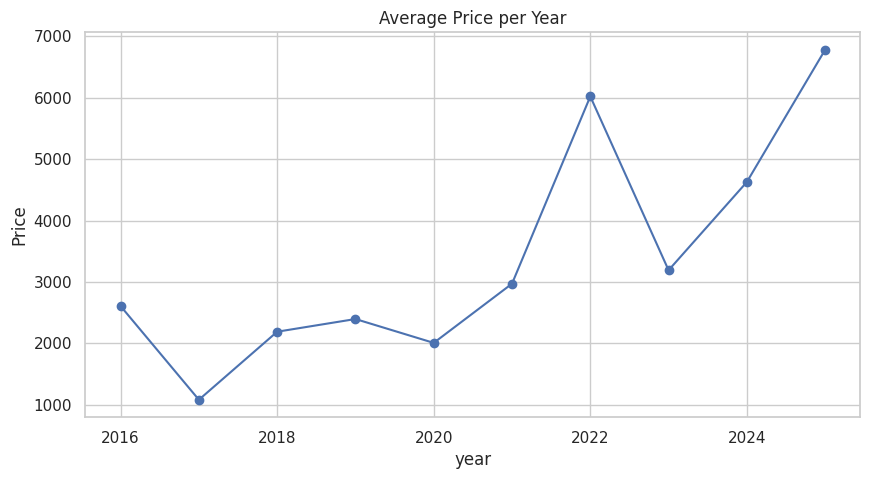

In [13]:
yearly = df.groupby('year')['Price'].mean()

plt.figure(figsize=(10,5))
yearly.plot(marker='o')
plt.title("Average Price per Year")
plt.ylabel("Price")
plt.show()


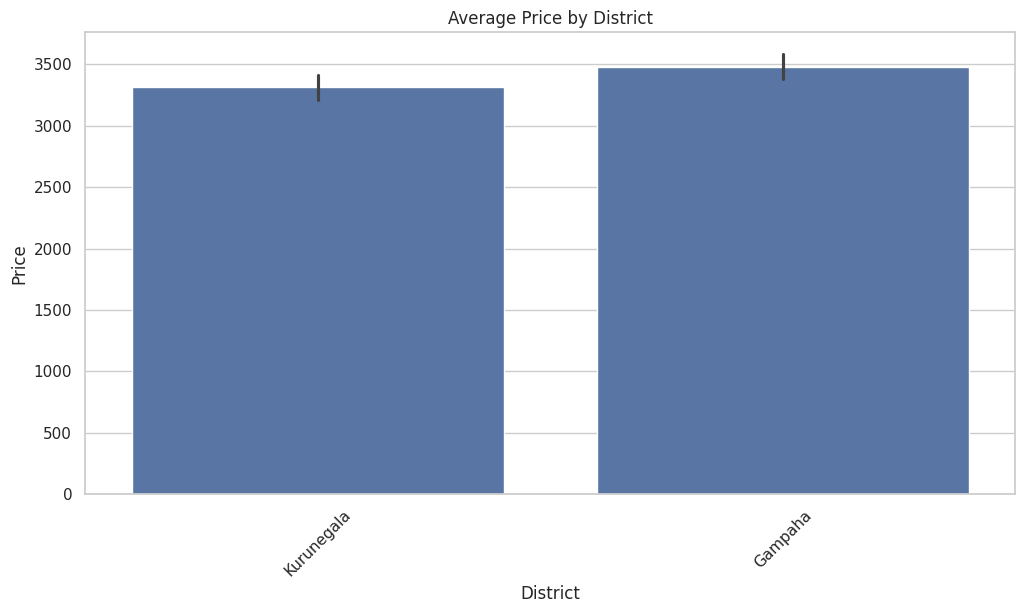

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='District', y='Price', estimator='mean')
plt.title("Average Price by District")
plt.xticks(rotation=45)
plt.show()


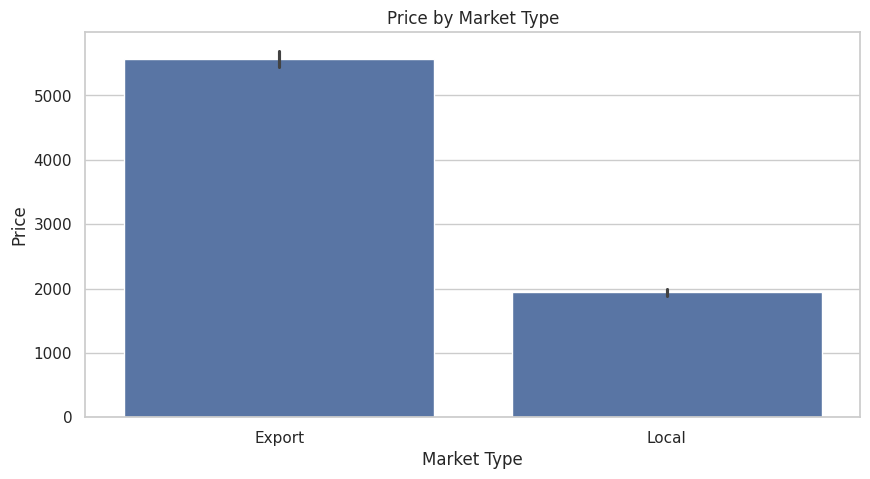

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Market Type', y='Price')
plt.title("Price by Market Type")
plt.show()


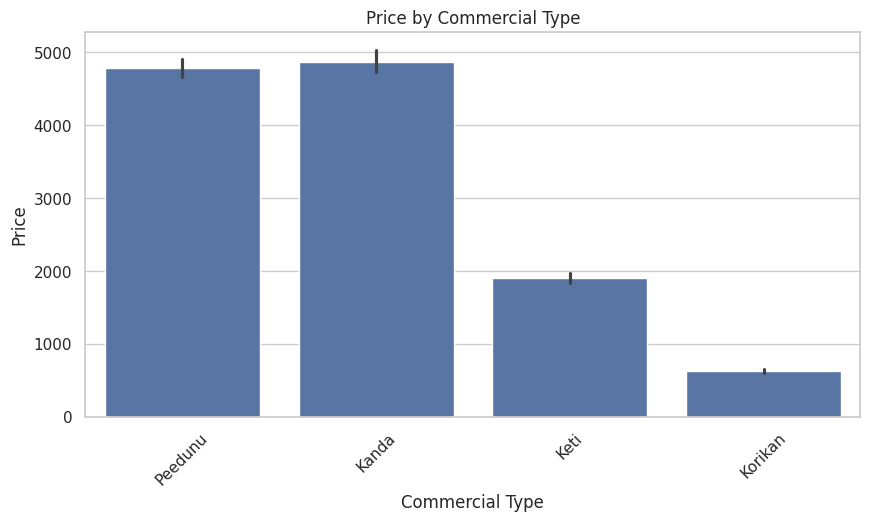

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Commercial Type', y='Price')
plt.title("Price by Commercial Type")
plt.xticks(rotation=45)
plt.show()


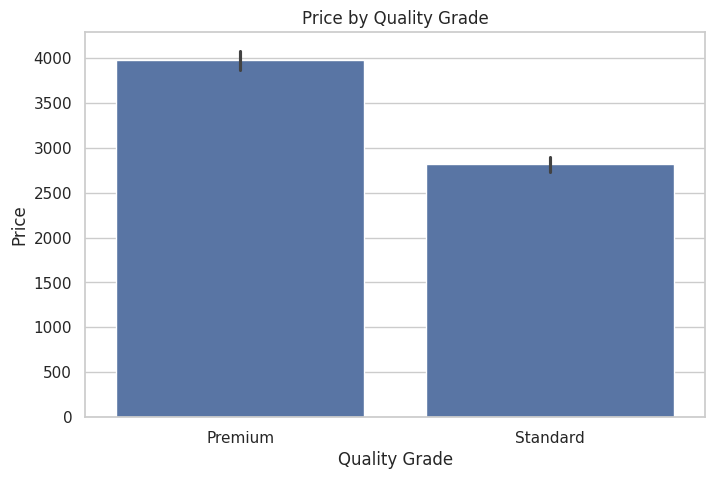

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Quality Grade', y='Price')
plt.title("Price by Quality Grade")
plt.show()


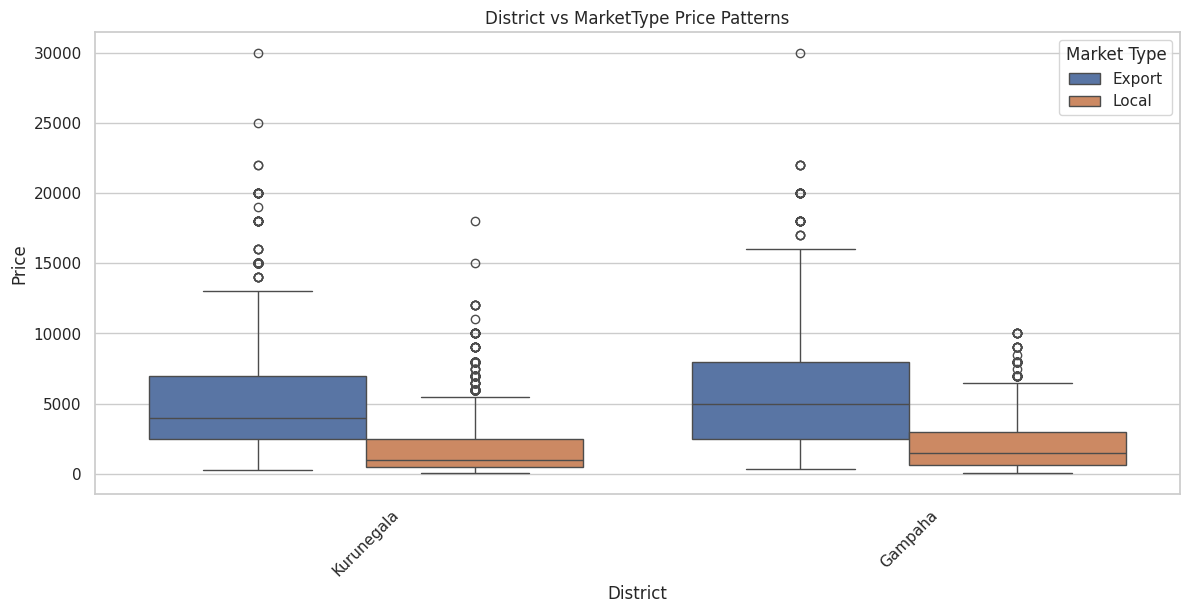

In [21]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='District', y='Price', hue='Market Type')
plt.title("District vs MarketType Price Patterns")
plt.xticks(rotation=45)
plt.show()


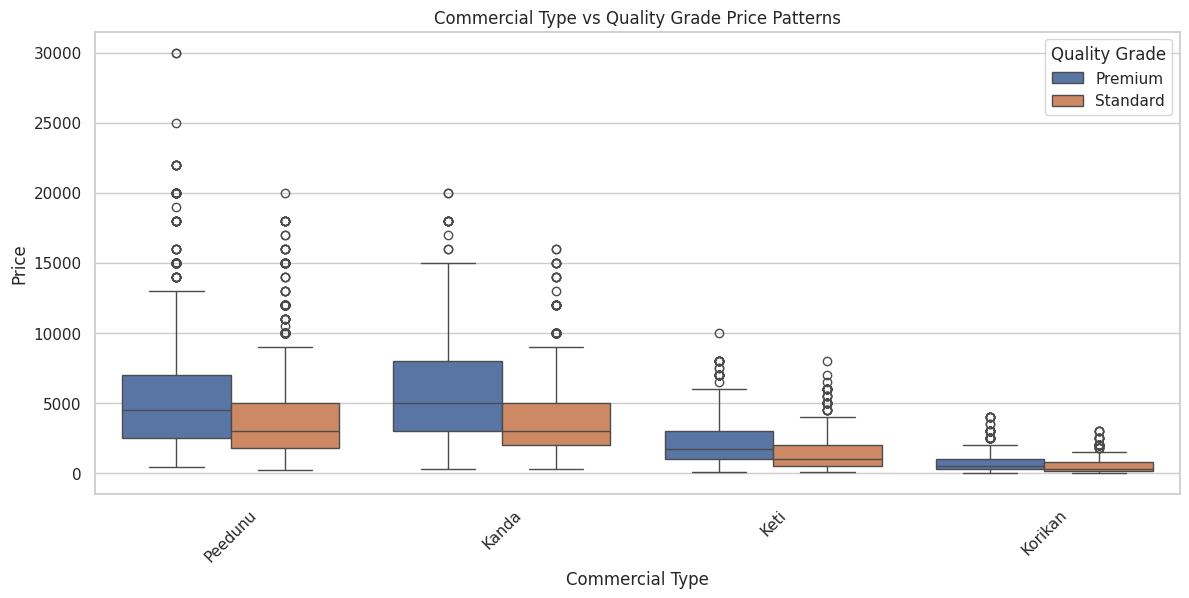

In [22]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Commercial Type', y='Price', hue='Quality Grade')
plt.title("Commercial Type vs Quality Grade Price Patterns")
plt.xticks(rotation=45)
plt.show()


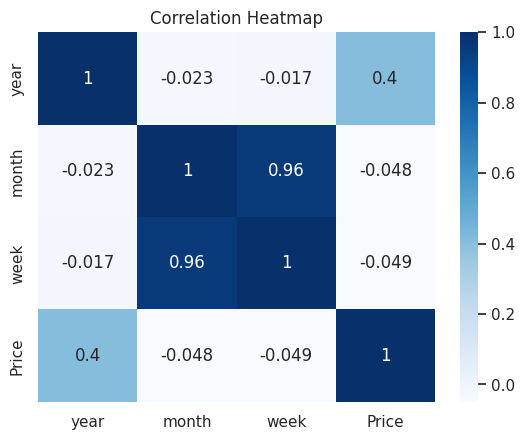

In [24]:
num_df = df[['year', 'month', 'week', 'Price']]
sns.heatmap(num_df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


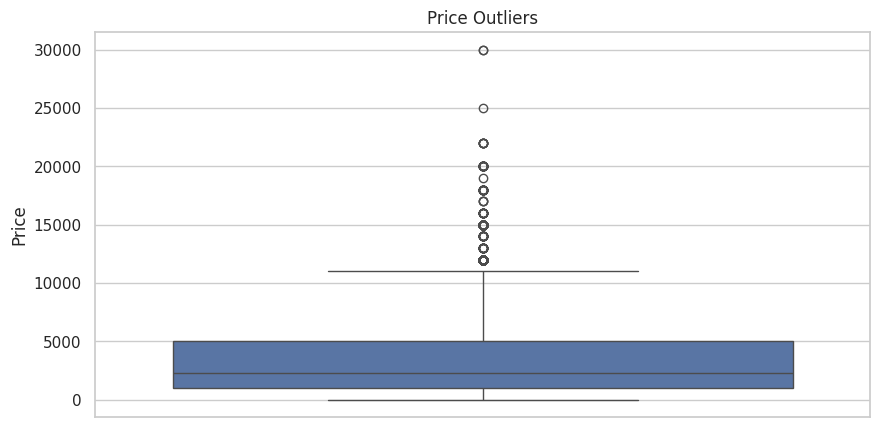

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y='Price')
plt.title("Price Outliers")
plt.show()


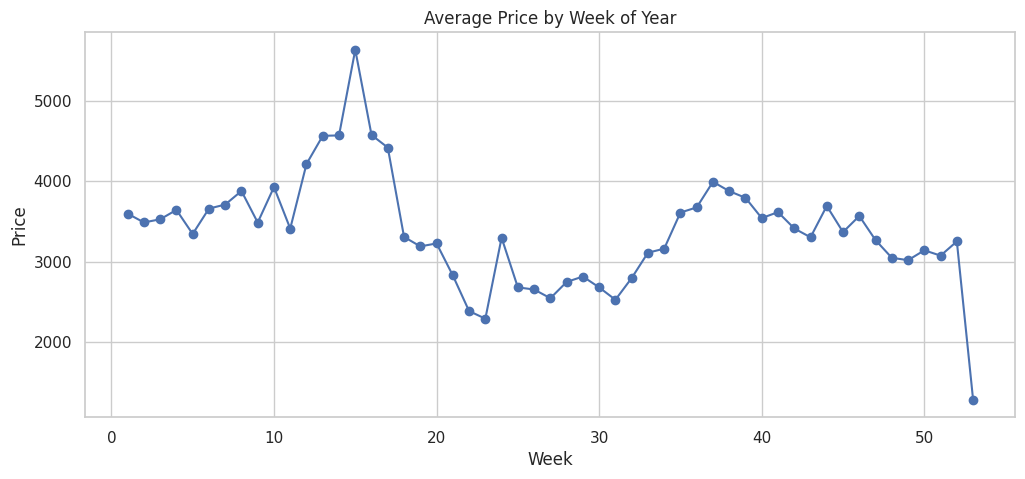

In [27]:
weekly_avg = df.groupby('week')['Price'].mean()

plt.figure(figsize=(12,5))
weekly_avg.plot(marker='o')
plt.title("Average Price by Week of Year")
plt.xlabel("Week")
plt.ylabel("Price")
plt.show()


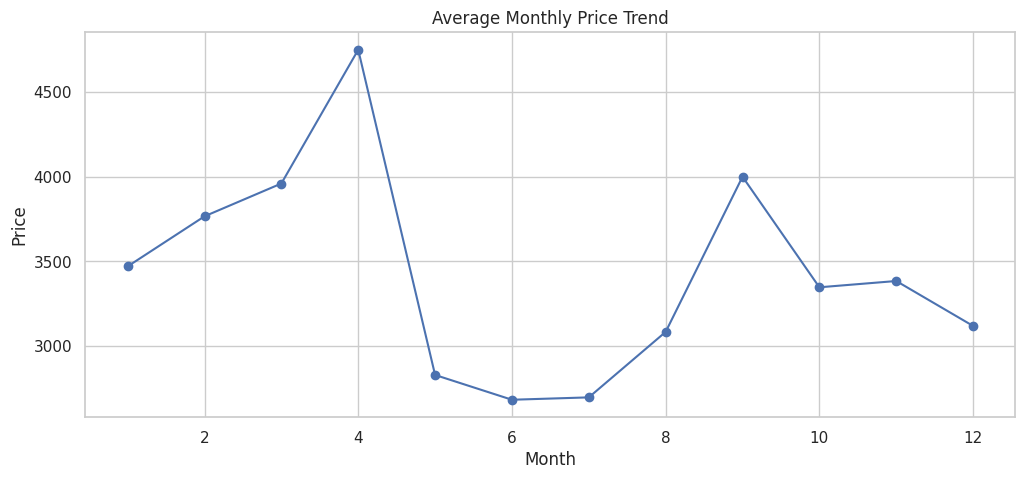

In [28]:
monthly_avg = df.groupby('month')['Price'].mean()

plt.figure(figsize=(12,5))
monthly_avg.plot(marker='o')
plt.title("Average Monthly Price Trend")
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()
